# Package Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec, rc
import matplotlib as mpl
import mplhep as hep
import seaborn as sns
import scipy as sp
import os
import my_files as mf
import my_vectors as mv
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
print(tf.__version__)
filepath = '../Updated signal features/npz files/'
for dirname, _, filenames in os.walk(filepath):
    for filename in filenames:
        print(os.path.join(dirname, filename))
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
tf.config.threading.set_intra_op_parallelism_threads(0)
tf.config.threading.set_inter_op_parallelism_threads(0)

2023-12-27 14:59:40.238455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0
../Updated signal features/npz files/LeptonP.npz
../Updated signal features/npz files/WmBoson.npz
../Updated signal features/npz files/LpNu.npz
../Updated signal features/npz files/WpBoson.npz
../Updated signal features/npz files/MET.npz
../Updated signal features/npz files/CGLMP.npz
../Updated signal features/npz files/LeadLepton.npz
../Updated signal features/npz files/LmNu.npz
../Updated signal features/npz files/Higgs.npz
../Updated signal features/npz files/subLeadLepton.npz
../Updated signal features/npz files/xi_xyz.npz
../Updated signal features/npz files/LeptonM.npz
../Updated signal features/npz files/diLepton.npz


# Load Data

In [ ]:
GeV = 0.001
LeptonP = mf.load_particle('LeptonP.npz', None, GeV)
LeptonM = mf.load_particle('LeptonM.npz', None, GeV)
LeptonM.head(10)  

In [2]:
%%time

GeV = 0.001
LeptonP = mf.load_particle('LeptonP.npz', None, GeV)
LeptonM = mf.load_particle('LeptonM.npz', None, GeV)
diLepton = mf.load_particle('diLepton.npz',None, GeV)
NeutrinoP = mf.load_particle('LpNu.npz', None, GeV)
NeutrinoM = mf.load_particle('LmNu.npz', None, GeV)
WBosonP = mf.load_particle('WpBoson.npz', None, GeV)
WBosonM = mf.load_particle('WmBoson.npz', None, GeV)
Higgs = mf.load_particle('Higgs.npz', None, GeV)
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(f):
    W = 1 if j == 'phi' else GeV
    MET[j] = mf.load_evt('MET.npz',j,None)*W
diNeutrino = pd.DataFrame()
diNeutrino['E'  ] = NeutrinoP['E' ]+NeutrinoM['E' ]
diNeutrino['px' ] = NeutrinoP['px']+NeutrinoM['px']
diNeutrino['py' ] = NeutrinoP['py']+NeutrinoM['py']
diNeutrino['pz' ] = NeutrinoP['pz']+NeutrinoM['pz']
diNeutrino['m2' ] = mv.vinv_mass_2(diNeutrino['E'],diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['P'  ] = mv.vvec_mag(diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['pt' ] = np.sqrt(diNeutrino['px']**2 + diNeutrino['py']**2)
diNeutrino['phi'] = np.arctan2(diNeutrino['py'],diNeutrino['px'])
diNeutrino['eta'] = np.arctanh(diNeutrino['pz']/diNeutrino['P'])
kinematic_var = Higgs.columns.to_list()
LeadingLep = pd.DataFrame(columns=kinematic_var)
SubleadLep = pd.DataFrame(columns=kinematic_var)
lp_leading = np.where(LeptonP['pt']>LeptonM['pt'],True,False)
LeadingLep = pd.merge(  LeptonP.iloc[ lp_leading,::],  LeptonM.iloc[~lp_leading,::],how='outer')
LeadingW   = pd.merge(  WBosonP.iloc[ lp_leading,::],  WBosonM.iloc[~lp_leading,::],how='outer')
LeadingNu  = pd.merge(NeutrinoP.iloc[ lp_leading,::],NeutrinoM.iloc[~lp_leading,::],how='outer')
SubleadLep = pd.merge(  LeptonP.iloc[~lp_leading,::],  LeptonM.iloc[ lp_leading,::],how='outer')
SubleadW   = pd.merge(  WBosonP.iloc[~lp_leading,::],  WBosonM.iloc[ lp_leading,::],how='outer')
SubleadNu  = pd.merge(NeutrinoP.iloc[~lp_leading,::],NeutrinoM.iloc[ lp_leading,::],how='outer')

Loaded E from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded py from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded m from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pt from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded eta from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded phi from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonM.npz co

<AxesSubplot:>

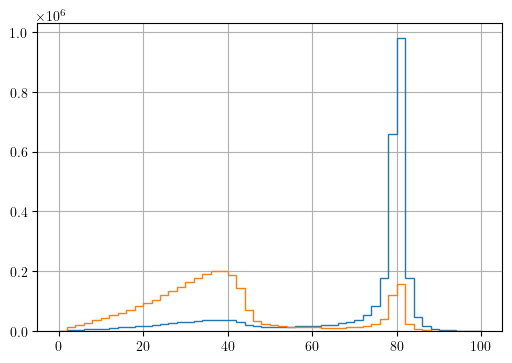

In [5]:
# ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y']
LeadingW['m'].hist(bins=50,figsize=(6,4),histtype='step',range=[0,100])
SubleadW['m'].hist(bins=50,figsize=(6,4),histtype='step',range=[0,100])

In [131]:
intervals = np.linspace(-np.pi,np.pi,4)
print(intervals[-1] == np.pi)

True


In [37]:
H,xb,yb = np.histogram2d(LeadingLep['phi'],LeadingNu['phi'],bins=[80,80],range=[[-np.pi, np.pi],[-np.pi, np.pi]])
print(np.max(H),np.min(H))

1196.0 117.0


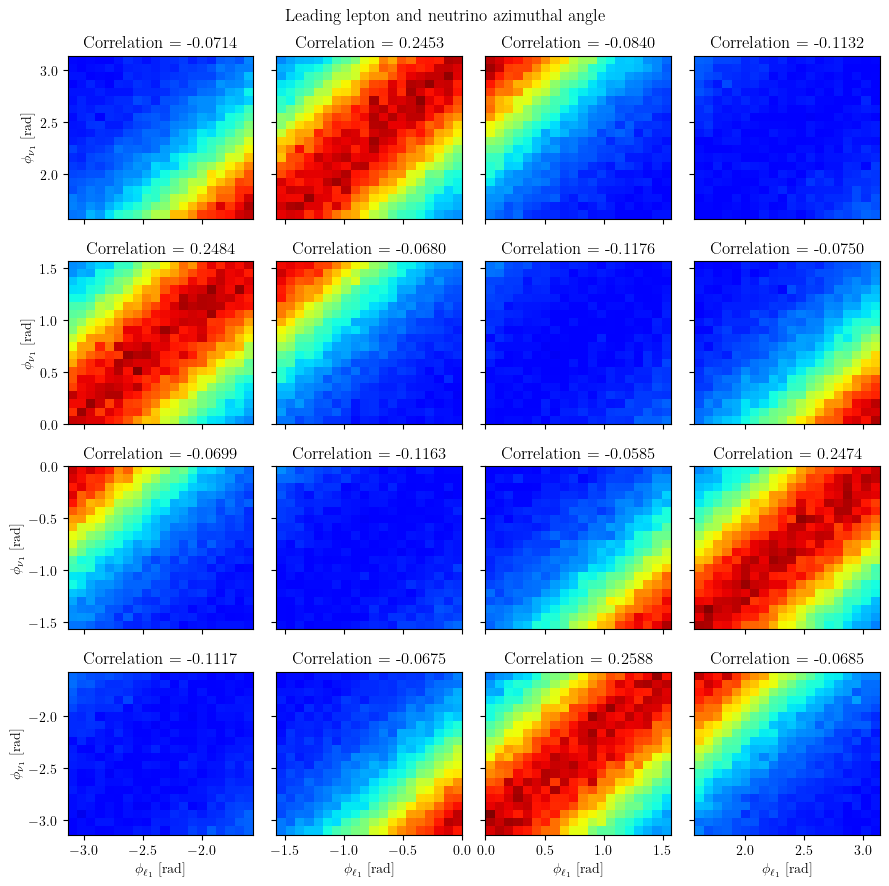

In [47]:
fig,ax = plt.subplots(nrows=4,ncols=4,sharex='col',sharey='row',figsize=(9,9),tight_layout=True)
plt.suptitle('Leading lepton and neutrino azimuthal angle')
x_intervals = np.linspace(-np.pi, np.pi,5)
y_intervals = np.linspace( np.pi,-np.pi,5)
for i in range(4):
    ax[3,i].set_xlabel(r'$\phi_{\ell_1}$ [rad]')
    ax[i,0].set_ylabel(r'$\phi_{ \nu_1}$ [rad]')
    x_upper = x_intervals[i+1]
    x_lower = x_intervals[i]
    a = 0.1 if i == 0 else 0
    abc = np.where((LeadingLep['phi']> x_lower-a),True,False)
    abc = np.where((LeadingLep['phi']<=x_upper)  ,True,False)&abc
    for j in range(4):
        y_upper = y_intervals[j]
        y_lower = y_intervals[j+1]
        a = 0.1 if j == 2 else 0
        xyz = np.where((LeadingNu['phi']> y_lower-a),True,False)
        xyz = np.where((LeadingNu['phi']<=y_upper  ),True,False)&xyz
        ax[j,i].hist2d(LeadingLep['phi'][abc],LeadingNu['phi'][abc],bins=[20,20],range=[[x_lower,x_upper],[y_lower,y_upper]],vmin=0,vmax=1200,cmap=my_cmap)
        coef = np.corrcoef(LeadingLep['phi'][abc&xyz],LeadingNu['phi'][abc&xyz])[0,1]
        ax[i,j].set_title('Correlation = {:.4f}'.format(coef))
plt.show()

In [105]:
a = np.arange(10)
print(a[0:-1])

[0 1 2 3 4 5 6 7 8]


# Solving neutrino 

In [132]:
evt_id = (np.random.choice(len(Higgs['E']),size=1))[0]
error = 1 + np.random.rand(2)*np.random.choice([-1,1],size=2,replace=True)
print(error)
m_Higgs = 125.35 # GeV
four_momentum = ['E','px','py','pz','m']
diLep = diLepton.loc[evt_id,four_momentum].to_numpy()
diNu  = np.array([diNeutrino[ 'E'].iat[evt_id],\
                  diNeutrino['px'].iat[evt_id],\
                  diNeutrino['py'].iat[evt_id],\
                  diNeutrino['pz'].iat[evt_id],\
          np.sqrt(diNeutrino['m2'].iat[evt_id])]) #(E, Px, Py, Pz, m)
PT_miss = MET.loc[evt_id,['pt','px','py']]
P_diLep = mv.vec_mag(diLep[1],diLep[2],diLep[3])
diNu_mass = diNeutrino['eta'].iat[evt_id]
if LeptonP.loc[evt_id,'pt'] > LeptonM.loc[evt_id,'pt']:
    WBoson1   =   WBosonP.loc[evt_id,four_momentum].to_numpy()
    WBoson2   =   WBosonM.loc[evt_id,four_momentum].to_numpy()
    Lepton1   =   LeptonP.loc[evt_id,four_momentum].to_numpy()
    Lepton2   =   LeptonM.loc[evt_id,four_momentum].to_numpy()
    Neutrino1 = NeutrinoP.loc[evt_id,four_momentum].to_numpy()
    Neutrino2 = NeutrinoM.loc[evt_id,four_momentum].to_numpy()
    Nu2_eta   = NeutrinoM.loc[evt_id,'eta']
else:
    WBoson1   =   WBosonM.loc[evt_id,four_momentum].to_numpy()
    WBoson2   =   WBosonP.loc[evt_id,four_momentum].to_numpy()
    Lepton1   =   LeptonM.loc[evt_id,four_momentum].to_numpy()
    Lepton2   =   LeptonP.loc[evt_id,four_momentum].to_numpy()
    Neutrino1 = NeutrinoM.loc[evt_id,four_momentum].to_numpy()
    Neutrino2 = NeutrinoP.loc[evt_id,four_momentum].to_numpy()
    Nu2_eta   = NeutrinoP.loc[evt_id,'eta']
print('Truth nu1',Neutrino1)
print('Truth nu2',Neutrino2)
def gen_parameter(mW2_err,eta_err):
    #'''
    M22 = ((WBoson2[4]*mW2_err)**2 - Lepton2[4]**2)/2
    PT22_coef =  Lepton2[0]*np.cosh(Nu2_eta*eta_err) - Lepton2[3]*np.sinh(Nu2_eta*eta_err)
    X22_coef  =  Lepton2[1]*-1
    Y22_coef  =  Lepton2[2]*-1
    M12 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*PT_miss[1] + 2*Lepton1[2]*PT_miss[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2
    #M12 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*diNu[1] + 2*Lepton1[2]*diNu[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2
    PT12_coef = (Lepton1[3]+diNu[3])*np.sinh(Nu2_eta*eta_err) - (Lepton1[0]+diNu[0])*np.cosh(Nu2_eta*eta_err)
    X12_coef  = (Lepton1[1]+PT_miss[1])
    #X12_coef  = (Lepton1[1]+diNu[1])
    Y12_coef  = (Lepton1[2]+PT_miss[2])
    #Y12_coef  = (Lepton1[2]+diNu[2])
    M21 = ((WBoson2[4]*mW2_err)**2 - Lepton2[4]**2)/2 + Lepton2[1]*PT_miss[1] + Lepton2[2]*PT_miss[2]
    #M21 = (WBoson2[4]**2 - Lepton2[4]**2)/2 + Lepton2[1]*diNu[1] + Lepton2[2]*diNu[2]
    PT21_coef =  Lepton2[0]*np.cosh(Nu2_eta*eta_err) - Lepton2[3]*np.sinh(Nu2_eta*eta_err)
    X21_coef  =  Lepton2[1]
    Y21_coef  =  Lepton2[2]
    M11 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*PT_miss[1] + 2*Lepton1[2]*PT_miss[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2 -(Lepton1[1]+PT_miss[1])*PT_miss[1]-(Lepton1[2]+PT_miss[2])*PT_miss[2]
    #M11 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*diNu[1] + 2*Lepton1[2]*diNu[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2 -(Lepton1[1]+diNu[1])*diNu[1]-(Lepton1[2]+diNu[2])*diNu[2]
    PT11_coef = (Lepton1[3]+diNu[3])*np.sinh(Nu2_eta*eta_err) - (Lepton1[0]+diNu[0])*np.cosh(Nu2_eta*eta_err)
    X11_coef  = (Lepton1[1]+PT_miss[1])*-1
    #X11_coef  = (Lepton1[1]+diNu[1])*-1
    Y11_coef  = (Lepton1[2]+PT_miss[2])*-1
    #Y11_coef  = (Lepton1[2]+diNu[2])*-1
    slope_2  = -1*(PT12_coef*X22_coef - PT22_coef*X12_coef)/(PT12_coef*Y22_coef - PT22_coef*Y12_coef)
    offset_2 =    (PT12_coef*M22      - PT22_coef*M12     )/(PT12_coef*Y22_coef - PT22_coef*Y12_coef)
    slope_1  = -1*(PT11_coef*X21_coef - PT21_coef*X11_coef)/(PT11_coef*Y21_coef - PT21_coef*Y11_coef)
    offset_1 =    (PT11_coef*M21      - PT21_coef*M11     )/(PT11_coef*Y21_coef - PT21_coef*Y11_coef)
    return np.array([[slope_1,offset_1],[slope_2,offset_2]])

def Nu_py_line(x,slope,offset):
    return (slope*x + offset)
def Nu_px_line(y,slope,offset):
    return (y - offset)/(slope)
print('Event :',evt_id)
parameters = gen_parameter(1,1)
err_params = gen_parameter(error[0],error[1])
#err_params = gen_parameter(1,1)
print(parameters)
print(err_params)
print('Neutrino 1')
print('slope           = ', parameters[0,0])
print('slope     (+err)= ', err_params[0,0])
print('intercept       = ', parameters[0,1])
print('intercept (+err)= ', err_params[0,1])
print('Neutrino 2')
print('slope           = ', parameters[1,0])
print('slope     (+err)= ', err_params[1,0])
print('intercept       = ', parameters[1,1])
print('intercept (+err)= ', err_params[1,1])

[0.74844886 1.52330814]
Truth nu1 [ 5.97798438 -1.80046936  2.66389868  5.03966748  0.        ]
Truth nu2 [ 45.05128516 -25.32965625  24.7470957  -27.84973828   0.        ]
Event : 2356011
[[ -33.56117388  -20.74883544]
 [ -33.56117388 -862.35903329]]
[[ -23.76098497 -897.71500821]
 [ -23.76098497  280.48749568]]
Neutrino 1
slope           =  -33.561173884968376
slope     (+err)=  -23.760984972501806
intercept       =  -20.7488354443058
intercept (+err)=  -897.7150082142783
Neutrino 2
slope           =  -33.561173884968376
slope     (+err)=  -23.760984972501806
intercept       =  -862.3590332889383
intercept (+err)=  280.4874956779818


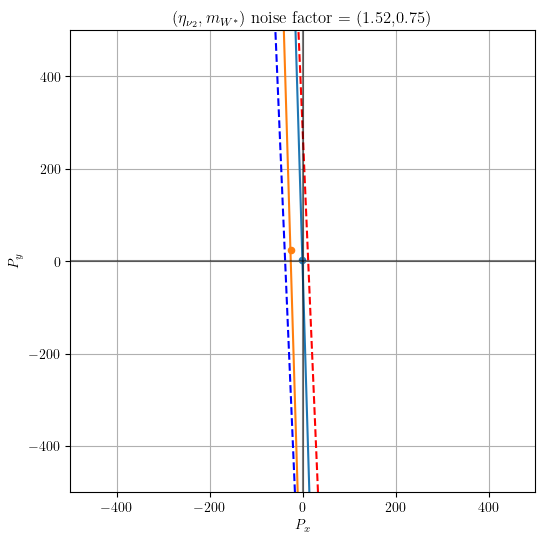

In [133]:
fig = plt.figure(figsize=(6,6))
x_points = np.linspace(-500,500,200)
plt.xlim(-500,500)
plt.xlabel(r"$P_x$")
plt.ylim(-500,500)
plt.ylabel(r"$P_y$")
plt.scatter(Neutrino1[1],Neutrino1[2],c='C0',s=20)
plt.scatter(Neutrino2[1],Neutrino2[2],c='C1',s=20)
Y1 = Nu_py_line(x_points,parameters[0,0],parameters[0,1])
Y2 = Nu_py_line(x_points,parameters[1,0],parameters[1,1])
U1 = Nu_py_line(x_points,err_params[0,0],err_params[0,1])
U2 = Nu_py_line(x_points,err_params[1,0],err_params[1,1])
plt.plot(x_points,Y1,c='C0')
plt.plot(x_points,Y2,c='C1')
plt.plot(x_points,U1,c='b',ls='dashed')
plt.plot(x_points,U2,c='r',ls='dashed')
plt.axvline(0,c='k',alpha=0.5)
plt.axhline(0,c='k',alpha=0.5)
plt.grid()
plt.title(r"$(\eta_{\nu_2},m_{W^*})$ noise factor = ({%.2f},{%.2f})"%(error[1],error[0]))
plt.show()

# Data Preprocessing

# Data preprocessing: $\phi$ rotation

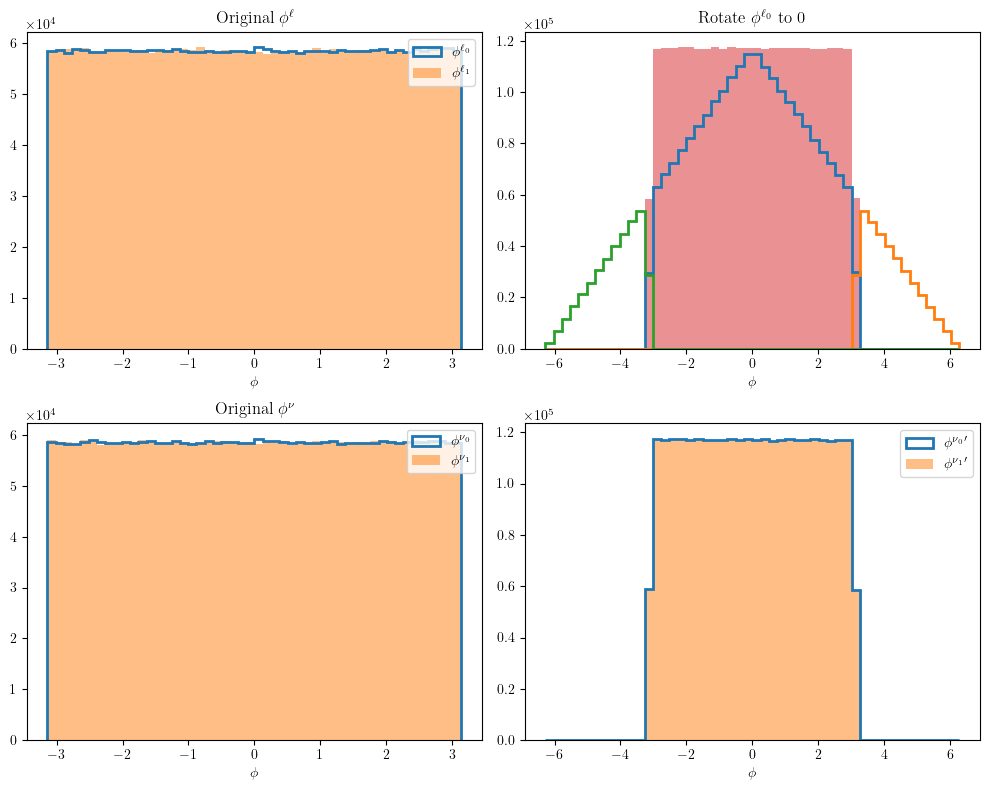

In [27]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8),tight_layout=True)
ax = ax.flatten()
ax[0].hist(LeadingLep['phi'],bins=50,range=[-np.pi,np.pi],histtype='step',lw=2,label=r'$\phi^{\ell_0}$')
ax[0].hist(SubleadLep['phi'],bins=50,range=[-np.pi,np.pi],histtype='bar',alpha=0.5,label=r'$\phi^{\ell_1}$')
ax[0].legend()
ax[0].ticklabel_format(axis='y',style="sci",useMathText=True,scilimits=(-4,4))
ax[0].set_xlabel(r'$\phi$')
ax[0].set_title(r'Original $\phi^{\ell}$')
#========= 
# Rotation: set phi angle as relative to the leading lepton (set leading lepton phi to 0)
#=========
d_phi = SubleadLep['phi'] - LeadingLep['phi']
d_phi_o = d_phi[d_phi>np.pi   ]
d_phi_u = d_phi[d_phi<np.pi*-1]
d_phi = d_phi[np.abs(d_phi)<np.pi]
ax[1].hist(d_phi  ,bins=50,range=[-2*np.pi,2*np.pi],histtype='step',lw=2)
ax[1].hist(d_phi_o,bins=50,range=[-2*np.pi,2*np.pi],histtype='step',lw=2)
ax[1].hist(d_phi_u,bins=50,range=[-2*np.pi,2*np.pi],histtype='step',lw=2)
phi_prime = np.concatenate((d_phi_u+2*np.pi,d_phi_o-2*np.pi,d_phi))
ax[1].hist(phi_prime,bins=50,range=[-2*np.pi,2*np.pi],histtype='bar',alpha=0.5,label=r'${\phi^{\ell_1}}^\prime$')
ax[1].ticklabel_format(axis='y',style="sci",useMathText=True,scilimits=(-4,4))
ax[1].set_xlabel(r'$\phi$')
ax[1].set_title("Rotate $\phi^{\ell_0}$ to $0$")
ax[2].hist(LeadingNu['phi'],bins=50,range=[-np.pi,np.pi],histtype='step',lw=2,label=r'$\phi^{\nu_0}$')
ax[2].hist(SubleadNu['phi'],bins=50,range=[-np.pi,np.pi],histtype='bar',alpha=0.5,label=r'$\phi^{\nu_1}$')
ax[2].legend()
ax[2].ticklabel_format(axis='y',style="sci",useMathText=True,scilimits=(-4,4))
ax[2].set_xlabel(r'$\phi$')
ax[2].set_title(r'Original $\phi^{\nu}$')
d_phi_l0v0 = LeadingNu['phi'] - LeadingLep['phi']
phi_l0v0_prime = np.concatenate((
    d_phi_l0v0[d_phi_l0v0>np.pi   ]-2*np.pi,\
    d_phi_l0v0[d_phi_l0v0<np.pi*-1]+2*np.pi,\
    d_phi_l0v0[np.abs(d_phi_l0v0)<np.pi],\
))
d_phi_l0v1 = SubleadNu['phi'] - LeadingLep['phi']
phi_l0v1_prime = np.concatenate((
    d_phi_l0v1[d_phi_l0v1>np.pi   ]-2*np.pi,\
    d_phi_l0v1[d_phi_l0v1<np.pi*-1]+2*np.pi,\
    d_phi_l0v1[np.abs(d_phi_l0v1)<np.pi],\
))
ax[3].hist(phi_l0v1_prime,bins=50,range=[-2*np.pi,2*np.pi],histtype='step',lw=2,label=r'${\phi^{\nu_0}}^\prime$')
ax[3].hist(phi_l0v1_prime,bins=50,range=[-2*np.pi,2*np.pi],histtype='bar',alpha=0.5,label=r'${\phi^{\nu_1}}^\prime$')
ax[3].legend()
ax[3].set_xlabel(r'$\phi$')
ax[3].ticklabel_format(axis='y',style="sci",useMathText=True,scilimits=(-4,4))
plt.show()

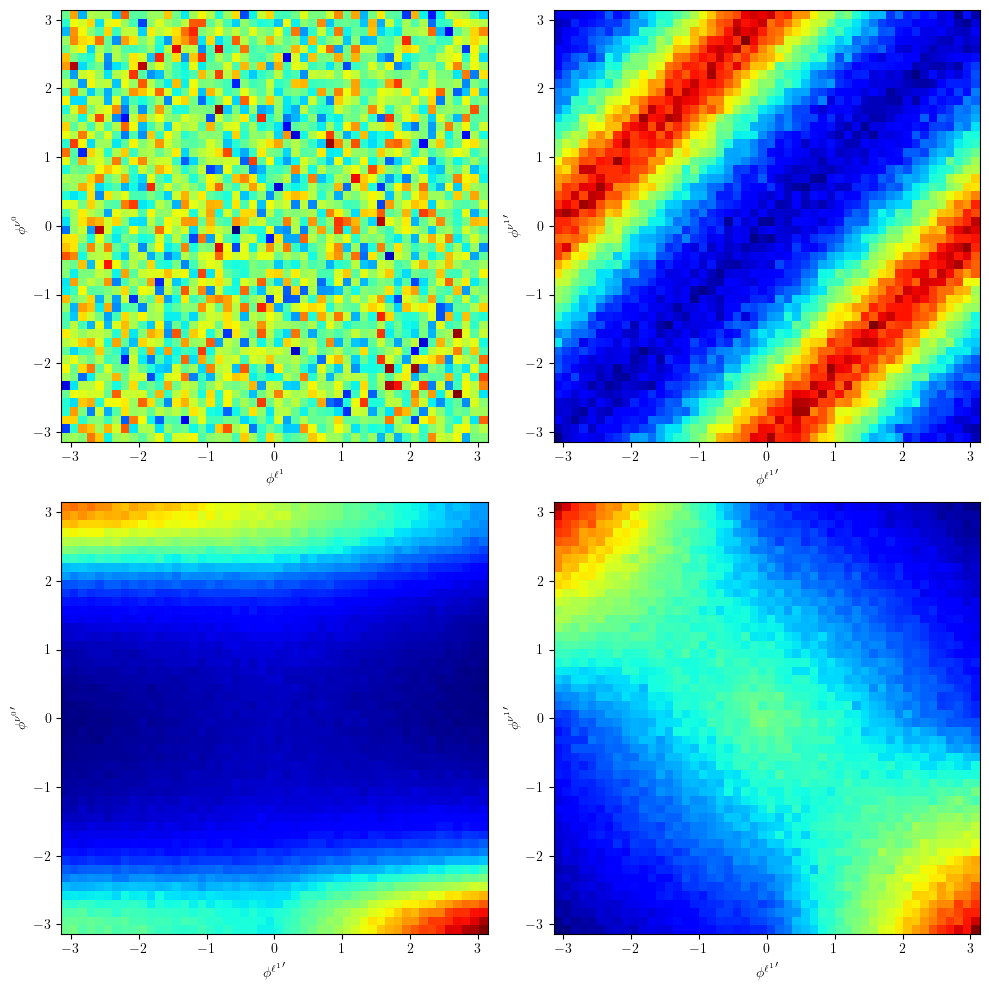

In [34]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10),tight_layout=True)
ax = ax.flatten()
ax[0].hist2d(SubleadLep['phi'],LeadingNu['phi'],bins=[50,50],range=[[-np.pi,np.pi],[-np.pi,np.pi]],cmap=my_cmap)
ax[0].set_xlabel(r'${\phi^{\ell^1}}$')
ax[0].set_ylabel(r'${\phi^{\nu^0 }}$')
ax[1].hist2d(SubleadLep['phi'],SubleadNu['phi'],bins=[50,50],range=[[-np.pi,np.pi],[-np.pi,np.pi]],cmap=my_cmap)
ax[1].set_xlabel(r'${\phi^{\ell^1}}^\prime$')
ax[1].set_ylabel(r'${\phi^{\nu^1 }}^\prime$')
ax[2].hist2d(phi_prime,phi_l0v0_prime,bins=[50,50],range=[[-np.pi,np.pi],[-np.pi,np.pi]],cmap=my_cmap)
ax[2].set_xlabel(r'${\phi^{\ell^1}}^\prime$')
ax[2].set_ylabel(r'${\phi^{\nu^0 }}^\prime$')
ax[3].hist2d(phi_prime,phi_l0v1_prime,bins=[50,50],range=[[-np.pi,np.pi],[-np.pi,np.pi]],cmap=my_cmap)
ax[3].set_xlabel(r'${\phi^{\ell^1}}^\prime$')
ax[3].set_ylabel(r'${\phi^{\nu^1 }}^\prime$')
plt.show()

# Data preparation

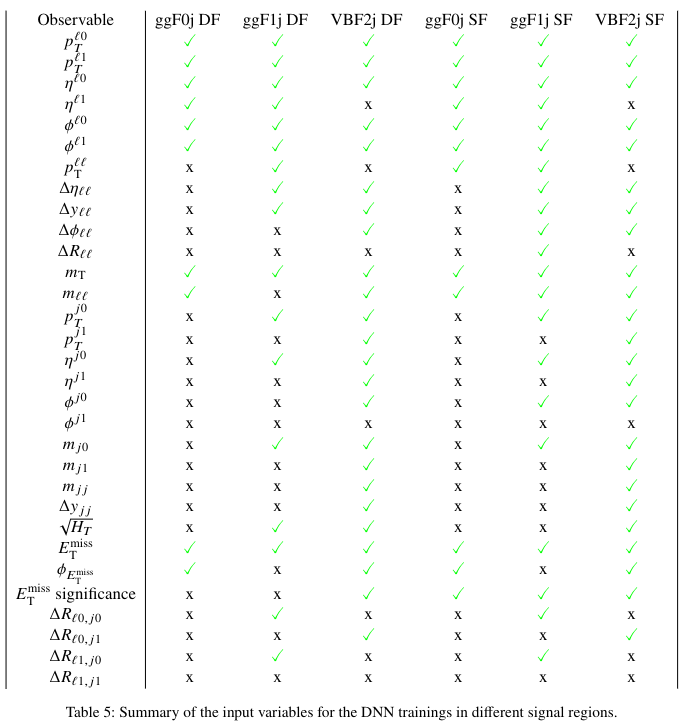

In [192]:
other_observables = pd.DataFrame()
diLepton['ET'] = np.sqrt(diLepton['m']**2+diLepton['pt']**2)
other_observables['mT'] = np.sqrt((diLepton['ET'] + MET['pt'])**2 - mv.vvec_mag_2((diLepton['px']+MET['px']),(diLepton['py']+MET['py']),0))#,diLepton['pz']))) 
#transverse mass of dilepton + met 
def rotate_phi(subject,reference):
    d_phi = subject - reference
    phi_prime = np.concatenate((
        d_phi[d_phi>np.pi   ]-2*np.pi,\
        d_phi[d_phi<np.pi*-1]+2*np.pi,\
        d_phi[np.abs(d_phi)<np.pi],\
    ))
    return phi_prime
other_observables['lep1_phi_prime'] = rotate_phi(SubleadLep['phi'],LeadingLep['phi'])
other_observables['nu0_phi_prime'] = rotate_phi(LeadingNu[ 'phi'],LeadingLep['phi'])
other_observables['nu1_phi_prime'] = rotate_phi(SubleadNu[ 'phi'],LeadingLep['phi'])
other_observables['d_phi_ll'] = np.abs(other_observables['lep1_phi_prime'])
other_observables['d_eta_ll'] = np.abs(LeadingLep['eta']-SubleadLep['eta'])

No handles with labels found to put in legend.


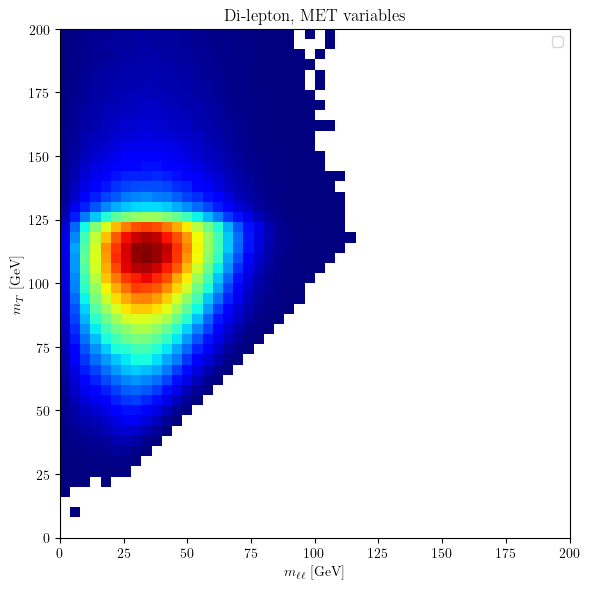

2928862


In [193]:

#other_observables['d_phi_ll'].hist(histtype='step')
#other_observables['d_eta_ll'].hist(histtype='step')
fig, ax = plt.subplots(1,1,figsize=(6,6),tight_layout=True)
ax.hist2d(diLepton['m'],other_observables['mT'],bins=[50,50],range=[[0,200],[0,200]],vmin=1,cmap=my_cmap)
#ax.hist(other_observables['mT'],bins=50,histtype='step',lw=2,range=[0,1000],label=r'$m_T$')
#ax.hist(diLepton['m'],bins=50,histtype='bar',alpha=0.5,range=[0,1000],label=r'$m_{\ell\ell}$')
#ax.hist(MET['pt'],bins=50,histtype='bar',alpha=0.5,range=[0,500])
#ax.hist(diLepton['ET'],bins=50,histtype='bar',alpha=0.5,range=[0,500])
#ax.hist(LeptonP['E']+LeptonM['E'],bins=50,histtype='bar',alpha=0.5)
ax.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-4,4))
ax.set_ylabel(r'$m_T$ [GeV]')
ax.set_xlabel(r'$m_{\ell\ell}$ [GeV]')
ax.set_title('Di-lepton, MET variables')
ax.legend()
plt.savefig('mT_mll_hist2D.png')
plt.show()
print(len(other_observables['mT']))

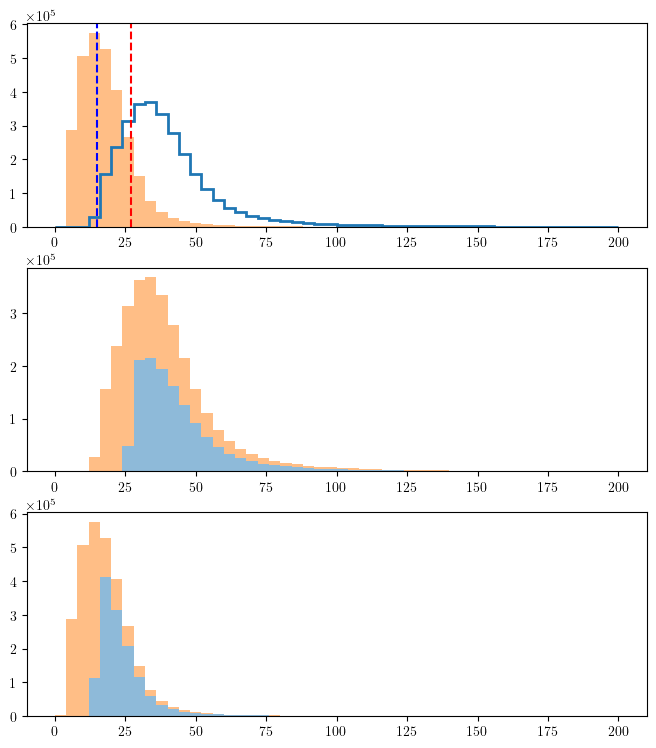

In [77]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,9))
a = np.where(LeadingLep['pt']>27,True,False)
b = np.where(SubleadLep['pt']>15,True,False)
ax[0].hist( LeadingLep['pt'],bins=50,range=[0,200],histtype='step',lw=2)
ax[0].axvline(15,ls='--',c='b')
ax[0].hist( SubleadLep['pt'],bins=50,range=[0,200],histtype='bar',lw=2,alpha=0.5)
ax[0].axvline(27,ls='--',c='r')
ax[1].hist([LeadingLep['pt'][a&b],LeadingLep['pt'][~(a&b)]],bins=50,range=[0,200],histtype='barstacked',alpha=0.5)
ax[2].hist([SubleadLep['pt'][a&b],SubleadLep['pt'][~(a&b)]],bins=50,range=[0,200],histtype='barstacked',alpha=0.5)
for i in ax:
    i.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-4,4))
plt.show()

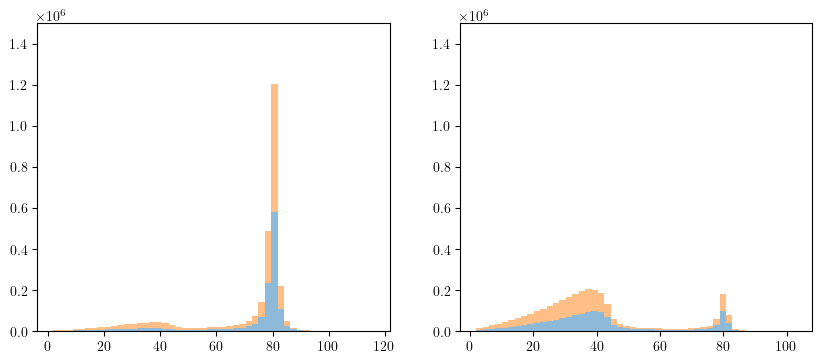

In [97]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].hist([LeadingW['m'][a&b],LeadingW['m'][~(a&b)]],bins=50,histtype='barstacked',alpha=0.5)
ax[1].hist([SubleadW['m'][a&b],SubleadW['m'][~(a&b)]],bins=50,histtype='barstacked',alpha=0.5)
for i in ax:
    i.set_ylim(0,1.5E6)
    i.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-4,4))
plt.show()

In [200]:
# selection of training data
a = np.where(LeadingLep['pt']>27,True,False)
b = np.where(SubleadLep['pt']>15,True,False)
criteria = a&b
criteria = np.where(LeadingLep['phi'],True,False)
N_evts = len(LeadingLep['phi'].to_numpy()[criteria])
print("Total event count: ",N_evts)
#sample_events = np.random.choice(len(Higgs['pz']),size=sample_size,replace=False)
training_data = pd.DataFrame()
#features = ['px','py','pt','phi']
# only using variables directly related to kinematics on transverse plane
#training_data = LeadingLep.loc[sample_events,features]
for i in ['pt','eta','phi','m']:
    training_data['Llep_'+i] = LeadingLep.loc[criteria,i]
    training_data['Slep_'+i] = SubleadLep.loc[criteria,i]
training_data['MET_pt'] = MET.loc[criteria,'pt']
training_data['MET_phi'] = MET.loc[criteria,'phi']
training_data['mT'] = other_observables.loc[criteria,'mT']
training_data['diLep_m'] = diLepton.loc[criteria,'m']
training_data['diLep_pt'] = diLepton.loc[criteria,'pt']
training_data['d_phi_ll'] = other_observables.loc[criteria,'d_phi_ll']
training_data['d_eta_ll'] = other_observables.loc[criteria,'d_eta_ll']
features = training_data.columns
print(features)
#training_data['data_label'] = SubleadW.loc[criteria,'m']# choose train target 
training_data['data_label'] = LeadingNu.loc[criteria,'phi']# choose train target 
data_mean = training_data['data_label'].mean()
data_std = training_data['data_label'].std()
training_data['normalized_data_label'] = (training_data['data_label'] - data_mean)/data_std
# random subset of data
N_sample = 200000
print("Sample size: ",N_sample)
training_data = training_data.sample(n=N_sample)
#sample_events = np.random.choice(N_evts,size=N_sample,replace=False)
# train : test : val = 7000 : 2000 : 1000
train_set,test_set,train_label,test_label = train_test_split(training_data.loc[::,features],training_data['normalized_data_label'],test_size=0.3,random_state=11)
test_set , val_set, test_label, val_label = train_test_split(test_set,test_label,test_size=1/3,random_state=27)
for i in [train_set,test_set,val_set,train_label,test_label,val_label]:
    i = tf.convert_to_tensor(i)
print("Training    data shape: ",  train_set.shape)
print("Training   label shape: ",train_label.shape)
print("Testing     data shape: ",   test_set.shape)
print("Testing    label shape: ", test_label.shape)
print("Validation  data shape: ",    val_set.shape)
print("Validation label shape: ",  val_label.shape)

Total event count:  2928862
Index(['Llep_pt', 'Slep_pt', 'Llep_eta', 'Slep_eta', 'Llep_phi', 'Slep_phi',
       'Llep_m', 'Slep_m', 'MET_pt', 'MET_phi', 'mT', 'diLep_m', 'diLep_pt',
       'd_phi_ll', 'd_eta_ll'],
      dtype='object')
Sample size:  200000
Training    data shape:  (140000, 15)
Training   label shape:  (140000,)
Testing     data shape:  (40000, 15)
Testing    label shape:  (40000,)
Validation  data shape:  (20000, 15)
Validation label shape:  (20000,)


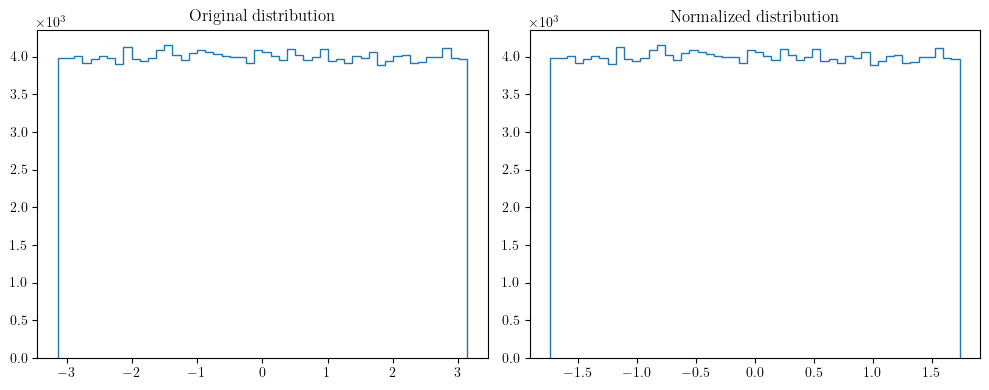

In [201]:

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4),tight_layout=True)
ax = ax.flatten()
x = np.where(training_data['data_label']<-9,training_data['data_label']+2*np.pi,training_data['data_label'])
ax[0].hist(x,histtype='step',bins=50)
ax[0].set_title("Original distribution")
ax[1].hist(training_data['normalized_data_label'],histtype='step',bins=50)
ax[1].set_title("Normalized distribution")
#ax[2].hist(np.cos(np.abs(data_label)),histtype='step',bins=50)
#ax[2].set_title("Cosine of original distribution")
for i in ax:
    i.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-3,3))
plt.show()

In [126]:
normalizer = tf.keras.layers.Normalization(axis=-1) # normalize along column (normalize feature value)
normalizer.adapt(train_set)
print(normalizer.mean)
def my_leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.01)
nodes = [1024,256,32]
depth = len(nodes)
NN_layers = [normalizer]
for i in range(depth):
    NN_layers.append(\
        layers.Dense(\
        nodes[i],\
        #kernel_initializer='normal',\
        activation='relu',\
        activity_regularizer=tf.keras.regularizers.L2(0)
        )
    )
# output layer  
NN_layers.append(layers.Dense(1,kernel_initializer='normal')) 
NN_model = tf.keras.Sequential(NN_layers)
NN_model.compile(
    optimizer=tf.keras.optimizers.SGD(
        nesterov=True,\
        momentum=0.99,\
        learning_rate=0.3,\
        ),\
    #loss='mean_squared_error'
    loss='mean_absolute_error'
)
NN_model.summary()
i = i+1
loss_epoch = np.array([])
validation_loss = np.array([])

tf.Tensor(
[[ 4.4860821e+01  2.4059317e+01  3.1072418e-03  1.1824360e-03
  -3.7644240e-03 -7.5850473e-03  5.3814035e-02  5.2825652e-02
   4.6901573e+01  2.8938209e-03  2.4413321e+02  3.5234032e+01
   4.8109589e+01  1.5739430e+00  1.7901243e+00]], shape=(1, 15), dtype=float32)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normaliza  (None, 15)                31        
 tion)                                                           
                                                                 
 dense_33 (Dense)            (None, 1024)              16384     
                                                                 
 dense_34 (Dense)            (None, 256)               262400    
                                                                 
 dense_35 (Dense)            (None, 32)                8224      
                                         

In [127]:
%%time
cb = []

#'''
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.01)

#'''
cb.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,start_from_epoch=100))
cb.append(tf.keras.callbacks.LearningRateScheduler(scheduler))
history = NN_model.fit(
    x=train_set,
    y=train_label,
    validation_data=(val_set,val_label),
    epochs=500,
    use_multiprocessing=True,
    workers=4,
    callbacks=cb,
    initial_epoch = 0
)
loss_epoch = np.concatenate((loss_epoch,history.history['loss']))
validation_loss = np.concatenate((validation_loss,history.history['val_loss']))

Epoch 1/500
4375/4375 [==============================] - 9s 2ms/step - loss: 0.7507 - val_loss: 0.7519 - lr: 0.3000
Epoch 2/500
4375/4375 [==============================] - 8s 2ms/step - loss: 0.7500 - val_loss: 0.7365 - lr: 0.3000
Epoch 3/500
4375/4375 [==============================] - 9s 2ms/step - loss: 0.7498 - val_loss: 0.7360 - lr: 0.3000
Epoch 4/500
4375/4375 [==============================] - 9s 2ms/step - loss: 0.7498 - val_loss: 0.7438 - lr: 0.3000
Epoch 5/500
4375/4375 [==============================] - 9s 2ms/step - loss: 0.7501 - val_loss: 0.7356 - lr: 0.3000
Epoch 6/500
4375/4375 [==============================] - 9s 2ms/step - loss: 0.7503 - val_loss: 0.7369 - lr: 0.3000
Epoch 7/500
4375/4375 [==============================] - 8s 2ms/step - loss: 0.7501 - val_loss: 0.7521 - lr: 0.3000
Epoch 8/500
4375/4375 [==============================] - 8s 2ms/step - loss: 0.7500 - val_loss: 0.7356 - lr: 0.3000
Epoch 9/500
4375/4375 [==============================] - 8s 2ms/step - l

1250/1250 [==============================] - 1s 1ms/step


/opt/conda/envs/aikit-tf/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/envs/aikit-tf/lib/python3.9/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


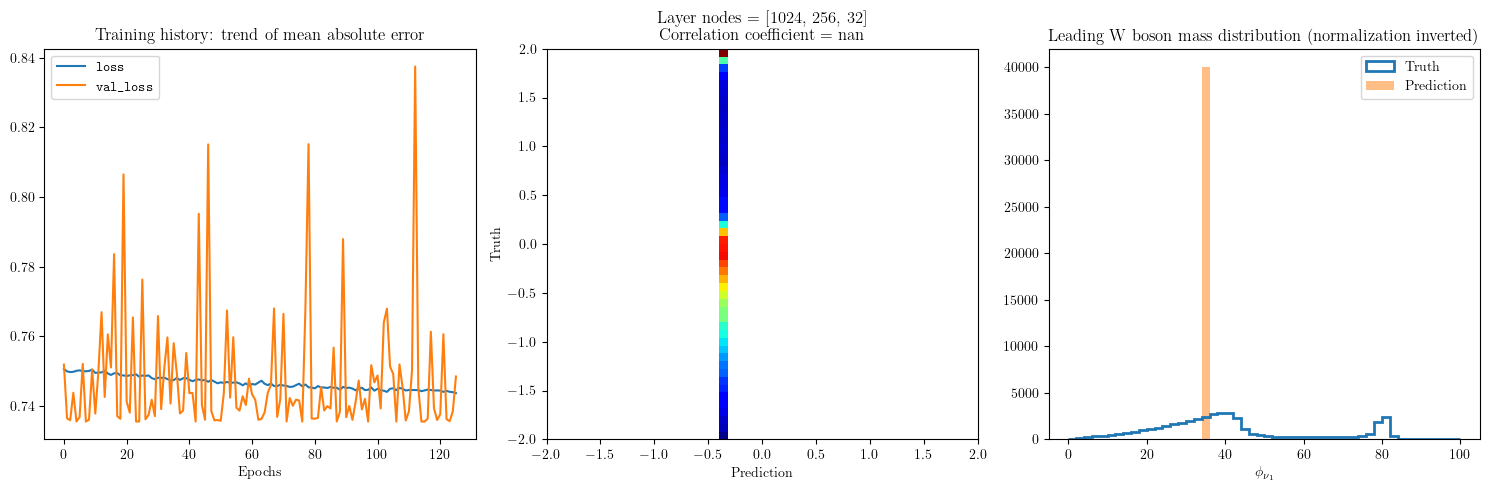

In [128]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
ax[0].plot(loss_epoch,label=r'\verb|loss|')
ax[0].plot(validation_loss,label=r'\verb|val_loss|')
ax[0].set_title("Training history: trend of mean absolute error")
ax[0].set_xlabel("Epochs")
ax[0].legend()
test_pred = NN_model.predict(test_set)[:,0]#[::,0,0]
#ax[1].set_xlim((-5,5))
#ax[1].set_ylim((-5,5))
ax[1].hist2d(test_pred,test_label,bins=[50,50],range=[[-2,2],[-2,2]],vmin=1,cmap=my_cmap)
ax[1].set_xlabel("Prediction")
ax[1].set_ylabel("Truth")
coef = np.corrcoef(test_pred,test_label)[0,1]
ax[1].set_title("Layer nodes = {}\nCorrelation coefficient = {:.4f}".format(nodes,coef))
ax[2].set_title(r"Leading W boson mass distribution (normalization inverted)")
inverted_prediction = test_pred*data_std + data_mean
inverted_label = test_label*data_std + data_mean
ax[2].hist(inverted_label,bins=50,range=[0,100],histtype='step',lw=2,label='Truth')
ax[2].hist(inverted_prediction,bins=50,range=[0,100],histtype='bar',alpha=0.5,label='Prediction')
ax[2].set_xlabel(r"$\phi_{\nu_1}$")
ax[2].legend()
filename = '../NN 20231217/NN_{}'.format(i)
for j in nodes:
    filename = filename + '_{}'.format(j)
filename = filename+'.png'
plt.savefig(filename)
plt.show()